In [15]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict ,Literal

In [16]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int
    equation:str
    discriment:float 
    result:str 

In [17]:
def show_equation(state:QuadState)->QuadState:
    eqn=f"{state['a']}x2{state['b']}x{state['c']}"
    return {'equation':eqn}

In [18]:
def cal_descriminant(state:QuadState)->QuadState:
    val=(state['b']**2)-(4*state['a']*state['c'])
    return {
        'discriment':val
    }

In [24]:
def real_root(state:QuadState)->QuadState:
    root1=(-state['b']+ state['discriment']**0.5)/(2*state['a'])
    root2=(-state['b']- state['discriment']**0.5)/(2*state['a'])
    result=f"Roots are {root1} and {root2}"
    return {
        'result':result    }

In [25]:
def repated_roots(state:QuadState)->QuadState:
    root=(-state['b'])/(2*state['a'])
    result=f"Roots are {root} and {root}"
    return {
        'result':result    }

In [30]:
def no_real_roots(state:QuadState)->QuadState:
    result=f"Roots are Imaginary "
    return {
        'result':result   }

In [ ]:
def check_condition(state:QuadState)->Literal['real_root','repated_roots','no_real_roots']:
    if(state['discriment']>0):
        return 'real_root'
    elif (state['discriment']==0):
        return 'repated_roots'
    else :
        return 'no_real_roots'


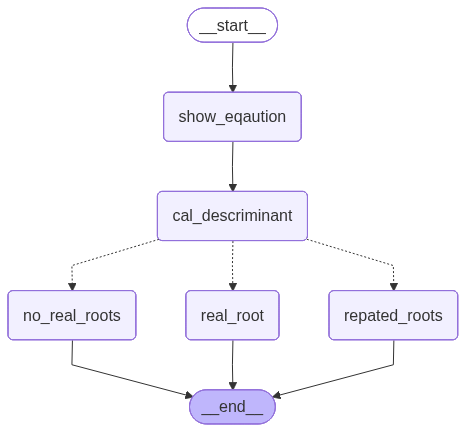

In [39]:
graph=StateGraph(QuadState)

graph.add_node('show_eqaution',show_equation)
graph.add_node('cal_descriminant',cal_descriminant)
graph.add_node('real_root',real_root)
graph.add_node('repated_roots',repated_roots)
graph.add_node('no_real_roots',no_real_roots)


graph.add_edge(START,'show_eqaution')
graph.add_edge('show_eqaution','cal_descriminant')
graph.add_conditional_edges('cal_descriminant',check_condition)
graph.add_edge('real_root',END)
graph.add_edge('repated_roots',END)
graph.add_edge('no_real_roots',END)

workflow=graph.compile()

workflow

In [40]:
intial_state={
    'a':4,
    'b':-5,
    'c':-4
}

final_state=workflow.invoke(intial_state)
final_state

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2-5x-4',
 'discriment': 89,
 'result': 'Roots are 1.8042476415070754 and -0.5542476415070754'}